# IBM Developer Skills Network

# Test activation Functions on MNIST Dataset

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pylab as plt
import numpy as np

# Neural Network Module and Training

In [33]:
# Build the model with sigmoid function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

In [21]:
# Network with Tanh

class NetTanh(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

In [22]:
# Network with ReLU

class NetRelu(nn.Module):

    # constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [34]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())
            
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff

# Get the Data

In [24]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [25]:
# Create the validation  dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [26]:
# criterion
criterion = nn.CrossEntropyLoss()

In [27]:
# loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

# Define the network, criterion, optimizer and train

In [28]:
criterion = nn.CrossEntropyLoss()

In [35]:
## Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)
print(model)

Net(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)


# Test Sigmoid, Tanh and Relu

In [36]:
# Train a model with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [37]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [38]:
# Train a model with Relu function
modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=30)

# Analyze the results

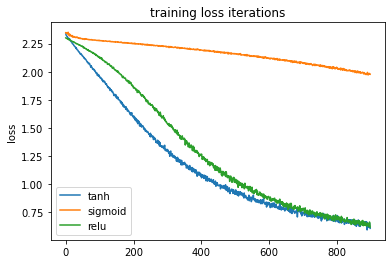

In [39]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

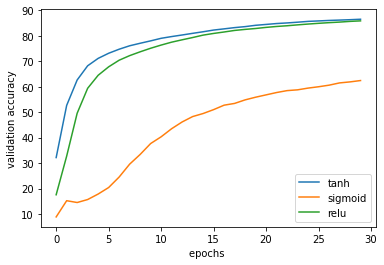

In [40]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()

Tanh is the best activation function!